# GOLD PRICE PREDICTION

## To import the required libraries

In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mp
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## To load the dataset using Pandas Dataframe

In [3]:
dataset = pd.read_csv('gold_price.csv')

## to just get a glimpse of the dataset

In [4]:
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


## To get total number of rows and columns

In [5]:
dataset.shape

(2290, 6)

## To get the datatypes of each attribute

In [6]:
dataset.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

## To check for the missing value in the dataset

In [7]:
dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

There is no missing value in this whole dataset

## To get the details of the dataset

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


## To get the Statiscal Information of this dataset

In [9]:
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## To get the distribution of gold price pictorial

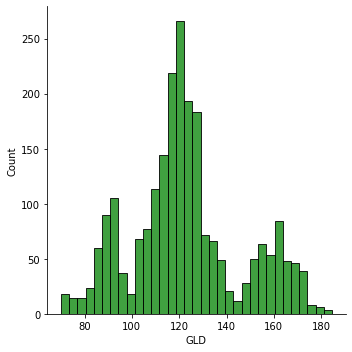

In [10]:
sb.displot(dataset['GLD'],color='green')

In [11]:
dataset.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

## Now, Let's split the dataset into features and target variable

In [12]:
X = dataset.drop(['Date','GLD'], axis=1)
Y = dataset['GLD']

In [13]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [14]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## Now, let's Train & Test the Dataset

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [17]:
print(Y.shape, Y_train.shape, Y_test.shape)

(2290,) (1832,) (458,)


## Let's create a Linear Regression Model for Predicting the price of a gold

In [18]:
model = RandomForestRegressor(n_estimators=100)

In [19]:
model.fit(X_train,Y_train)

RandomForestRegressor()

## Accruacy for Training & Testing

In [20]:
model.score(X_train,Y_train)*100

99.85606552282185

In [21]:
model.score(X_test,Y_test)*100

99.01619370486941

## Model Evaluation

In [22]:
prediction = model.predict(X_test)

In [23]:
prediction

array([168.54869936,  82.52499958, 116.12150024, 127.62130111,
       120.82630122, 154.82909788, 150.23429832, 126.20580017,
       117.38449869, 126.03660053, 116.57310112, 171.44020077,
       141.76509893, 167.95889872, 115.06040014, 117.63630066,
       138.06590347, 169.78170065, 159.75740305, 159.98649956,
       155.14469993, 125.31449999, 176.53579918, 157.42380356,
       125.27680048,  93.8458994 ,  77.74609999, 120.32379994,
       119.05189923, 167.5700999 ,  88.15620002, 125.36870021,
        91.14450101, 117.65890032, 121.11309874, 137.36130099,
       115.32300119, 114.80920061, 147.95769987, 107.20480107,
       104.36390239,  87.14429785, 126.56500035, 118.06820023,
       152.45189927, 119.59240018, 108.38589965, 108.35059846,
        93.19710044, 127.04109824,  75.41010035, 113.53299914,
       121.32070003, 111.25449906, 118.83799906, 120.59579942,
       159.39910058, 166.46140179, 147.21899717,  85.74299856,
        94.17810027,  86.69199888,  90.45540027, 119.10

In [24]:
Y_test = list(Y_test)

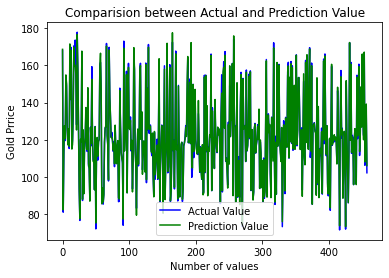

In [25]:
mp.plot(Y_test,color='blue', label='Actual Value')
mp.plot(prediction, color='green', label = 'Prediction Value')
mp.title('Comparision between Actual and Prediction Value')
mp.xlabel('Number of values')
mp.ylabel('Gold Prrice')
mp.legend()

In [27]:
model.predict([[1447.160034 ,78.470001, 15.1800 ,1.471692]])

C:\Users\91986\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([84.93460031])